<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/EEG-Tutorials-/blob/main/EEG_Pre_Processing_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mne


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.4 MB/s eta 0:00:00


In [2]:
from mne.datasets import eegbci

In [3]:
subject = 3
runs = 1

In [4]:
edf_paths = eegbci.load_data(subjects=subject, runs=runs, update_path=True)

Using default location ~/mne_data for EEGBCI...
Creating /root/mne_data


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Could not read the /root/.mne/mne-python.json json file during the writing. Assuming it is empty. Got: Expecting value: line 1 column 1 (char 0)
Download complete in 03s (1.2 MB)


In [5]:
import mne

In [6]:
edf_paths[0]
raw = mne.io.read_raw_edf(edf_paths[0], preload=True)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [7]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>

In [8]:
sampling_rate = raw.info['sfreq']
print("Sampling rate: " + str(sampling_rate))

Sampling rate: 160.0


In [9]:
import matplotlib.pyplot as plt

Using matplotlib as 2D backend.


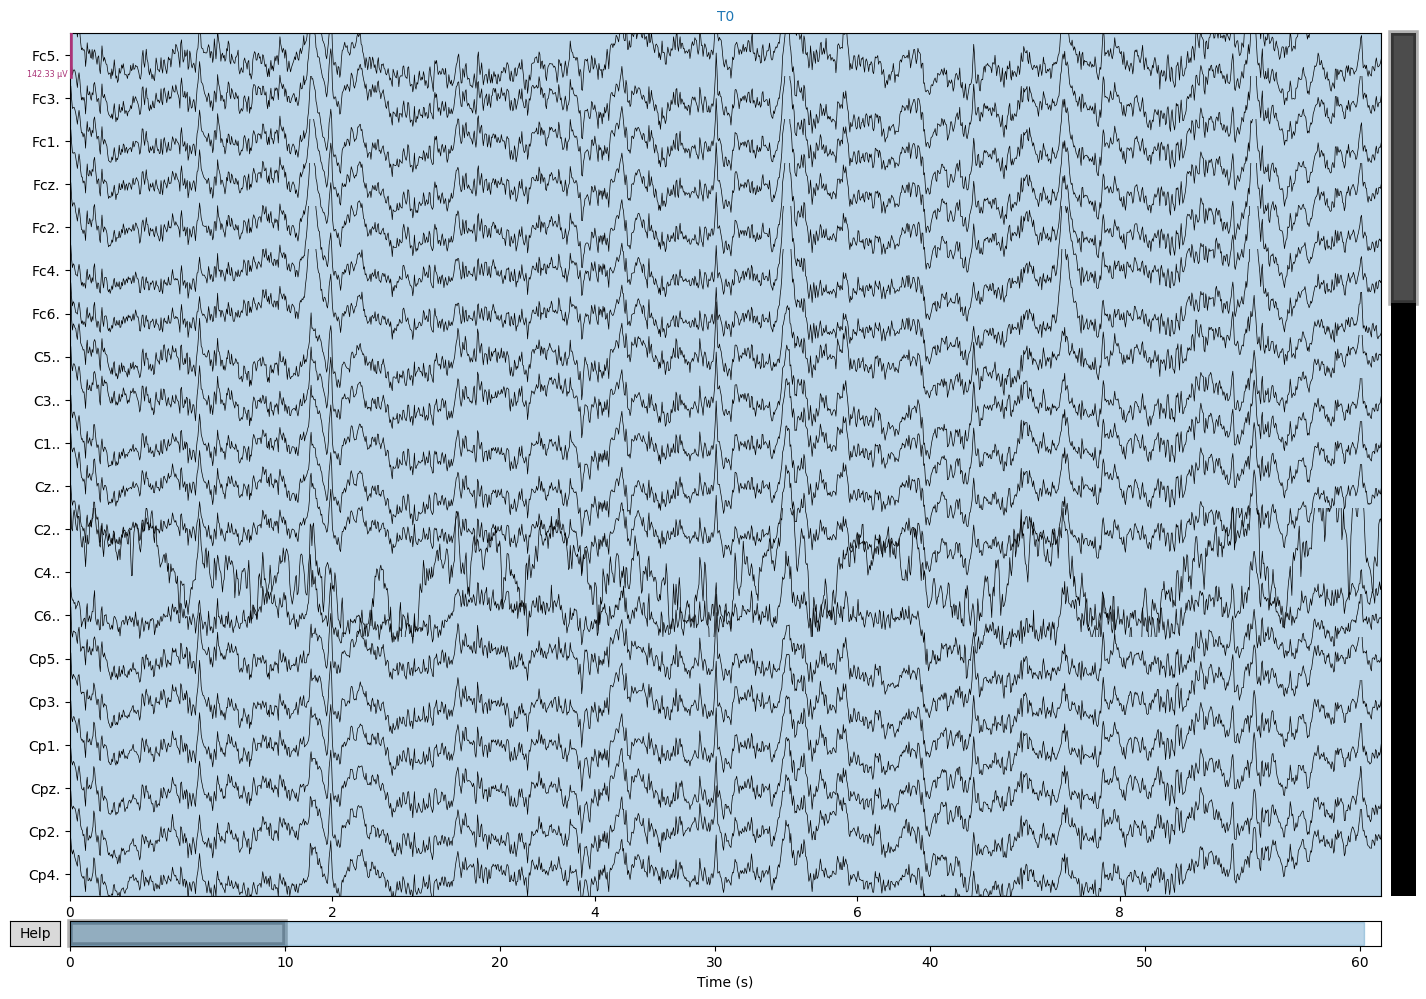

In [10]:
fig = raw.plot(scalings='auto', show=False)
fig.set_size_inches(15, 10)
plt.show()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


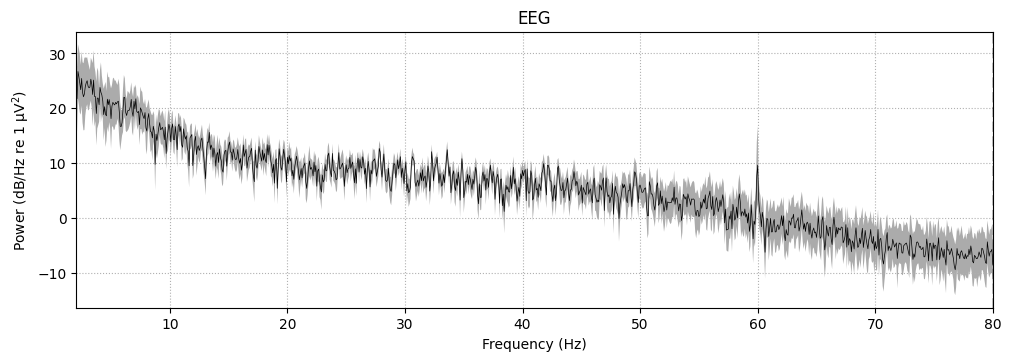

In [11]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

In [12]:
raw.notch_filter(freqs=60)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 s)



<RawEDF | S003R01.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


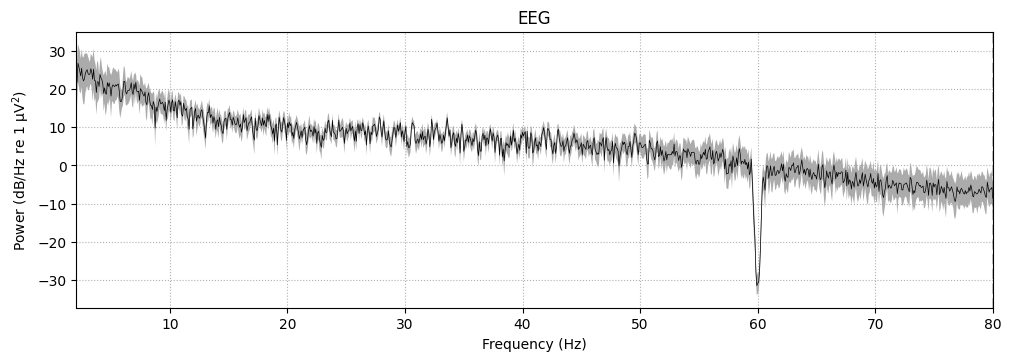

In [13]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=80, average=True, spatial_colors=False);

In [14]:
raw.resample(sfreq=120, npad='auto')

<RawEDF | S003R01.edf, 64 x 7320 (61.0 s), ~3.6 MiB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 17.067 (s)
Plotting power spectral density (dB=True).


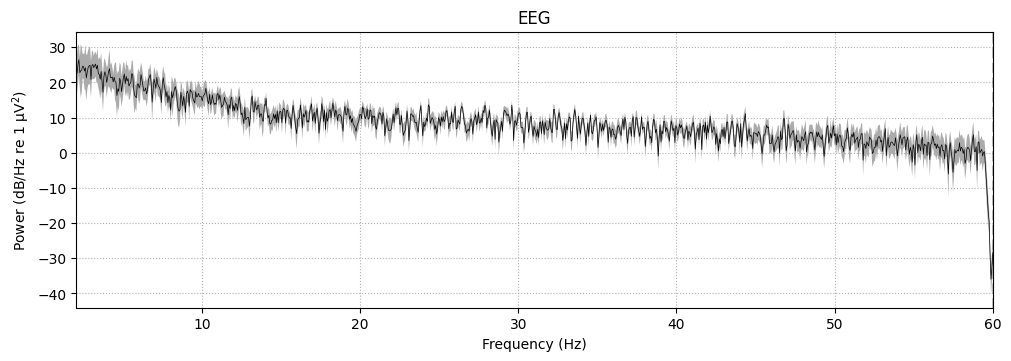

In [15]:
raw.plot_psd(tmin=0, tmax=60, fmin=2, fmax=60, average=True, spatial_colors=False);


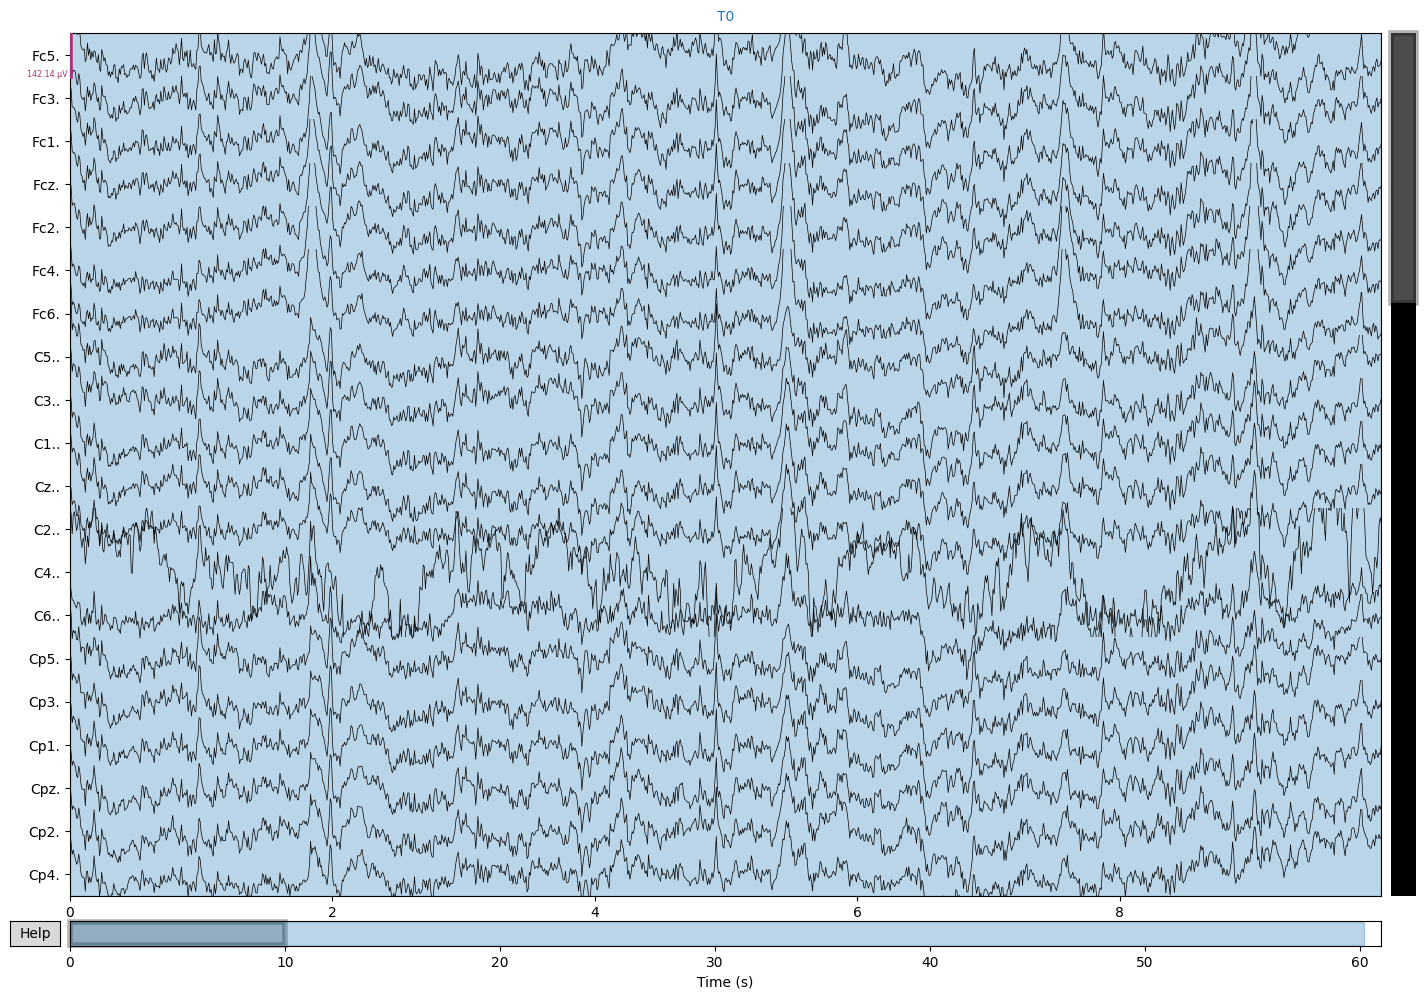

In [16]:
fig = raw.plot(scalings='auto', show=False)
fig.set_size_inches(15, 10)
plt.show()

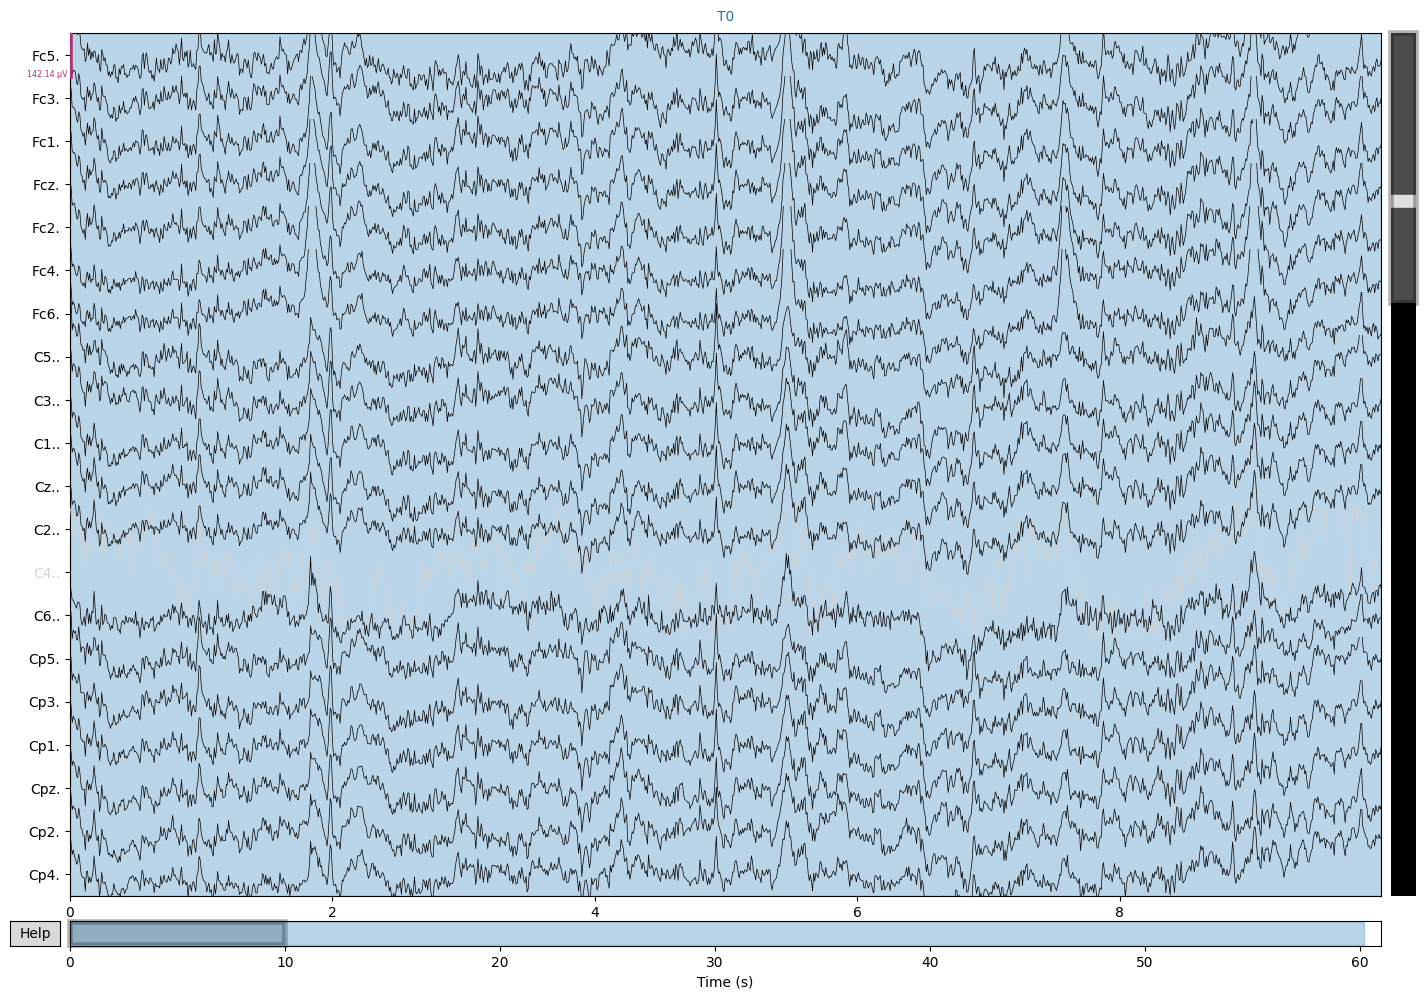

In [17]:
raw.info['bads'] += ['C4..']
picks = mne.pick_types(raw.info, exclude='bads')
figure = raw.plot(scalings='auto', show=False)
figure.set_size_inches(15, 10)

In [18]:
print(raw.info['chs'])

[{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fc5.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 2, 'scanno': 2, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fc3.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 3, 'scanno': 3, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fc1.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}, {'cal': 1.0, 'logno': 4, 'scanno': 4, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'c

In [19]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.rename_channels(mapping= lambda name: name.replace(".",""))
raw.set_montage(montage, match_case=False)

<RawEDF | S003R01.edf, 64 x 7320 (61.0 s), ~3.6 MiB, data loaded>

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.6 mm
Computing interpolation matrix from 63 sensor positions
Interpolating 1 sensors


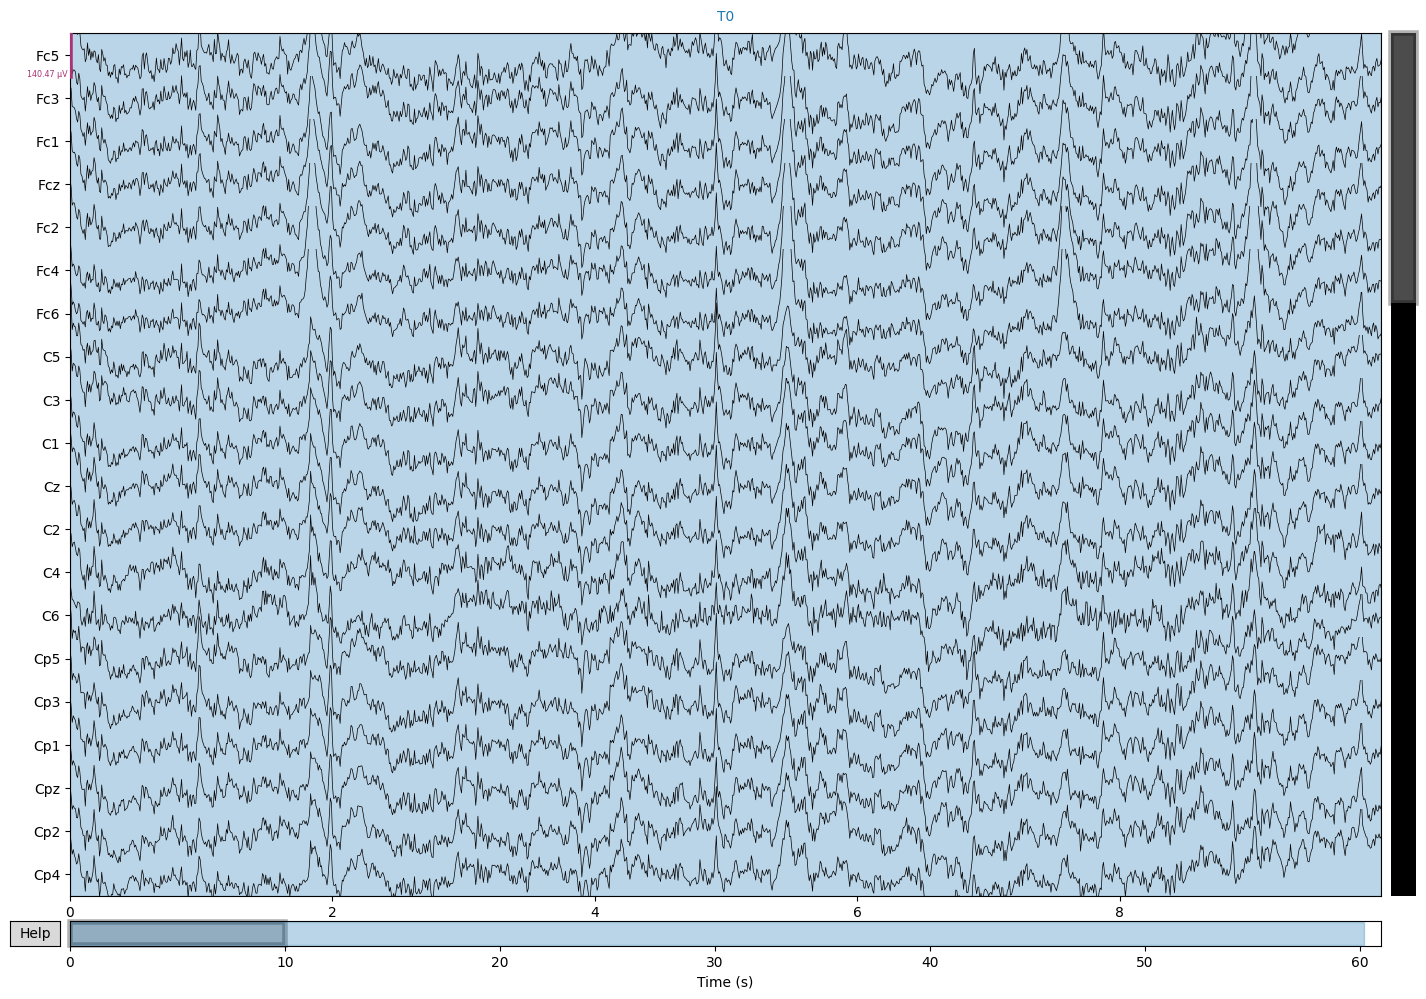

In [20]:
raw.interpolate_bads(reset_bads=True)
figure2 = raw.plot(scalings='auto', show=False)
figure2.set_size_inches(15, 10)

In [22]:
from mne import Epochs,find_events

# Specific MNE Imports
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import make_standard_montage
from mne.preprocessing import ICA

In [23]:
num_components = 15 #play around with this number to get components that seem to represent the actual brain activations well
ica = ICA(n_components=num_components, method='fastica')
ica.fit(raw)

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 15 components


/tmp/ipython-input-40458311.py:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 11.2s.


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


<ICA | raw data decomposition, method: fastica (fit in 1000 iterations on 7320 samples), 15 ICA components (64 PCA components available), channel types: eeg, no sources marked for exclusion>

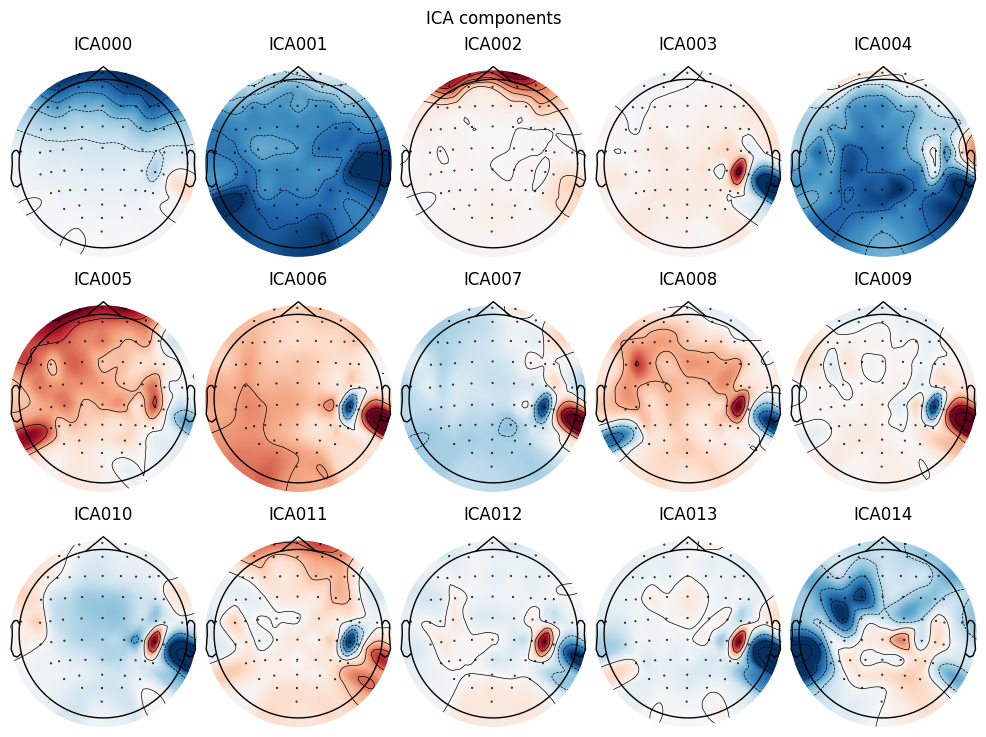

In [24]:
ica.plot_components();

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
30 matching events found
No baseline correction applied
0 projection i

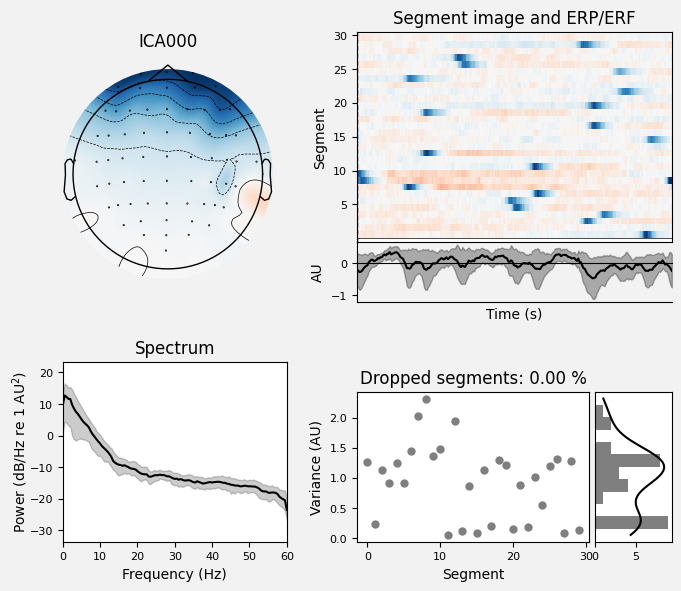

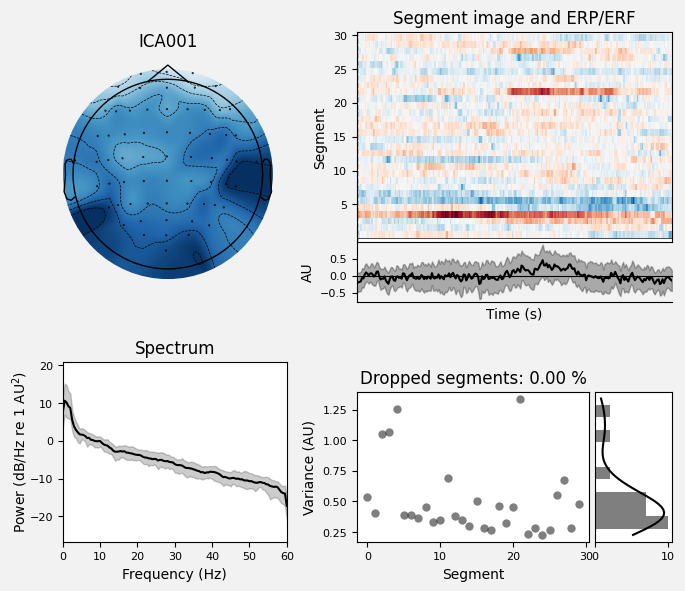

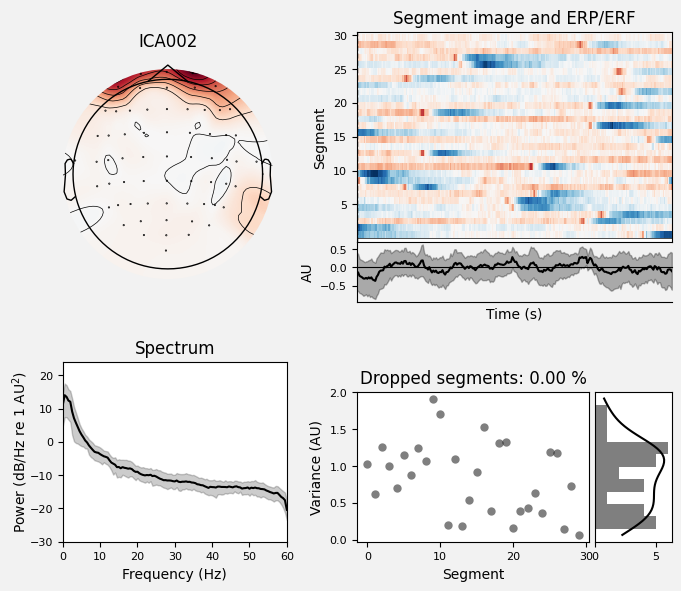

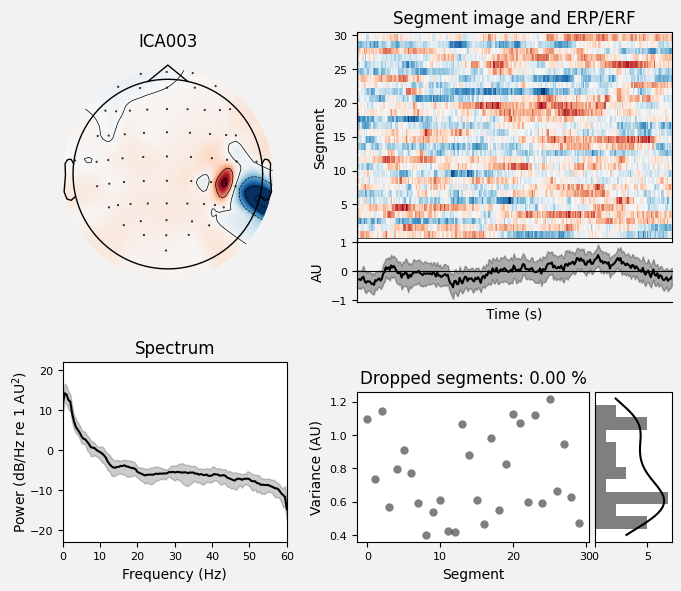

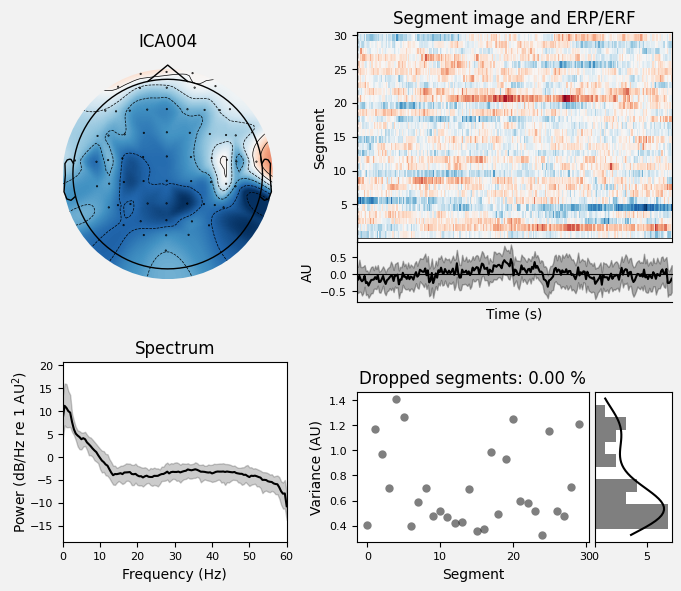

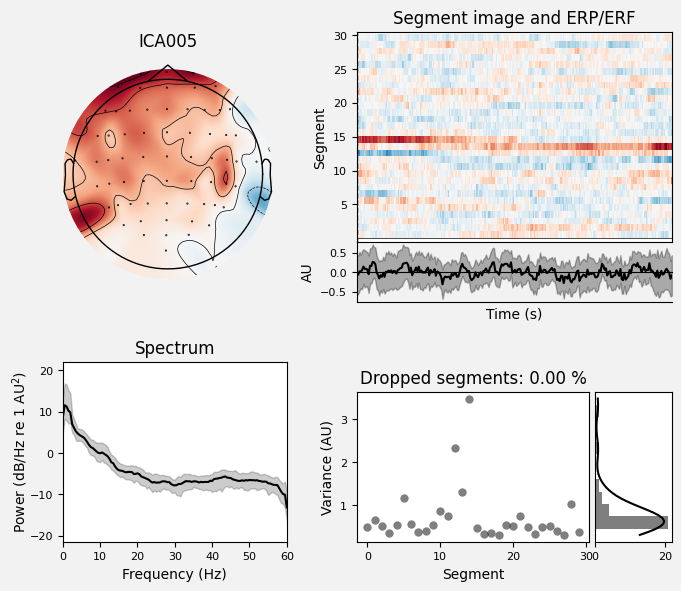

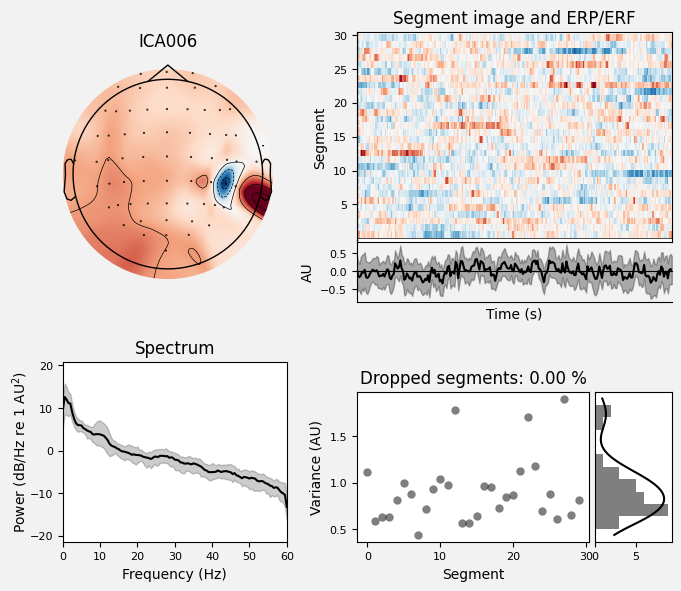

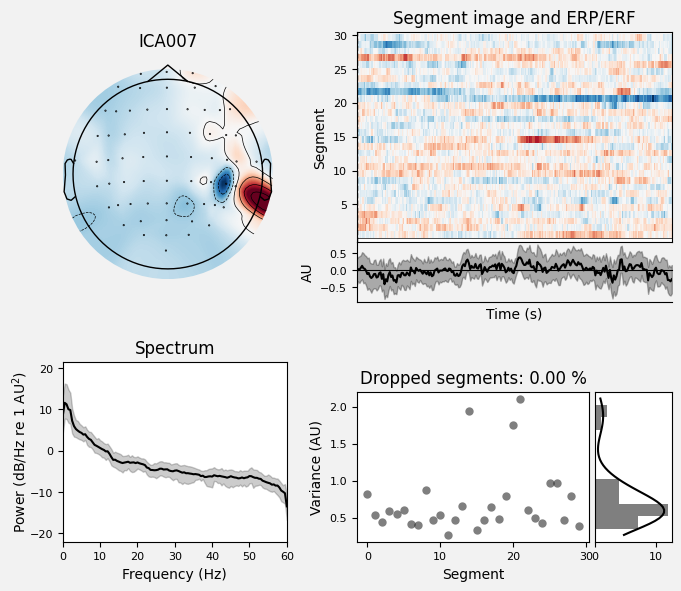

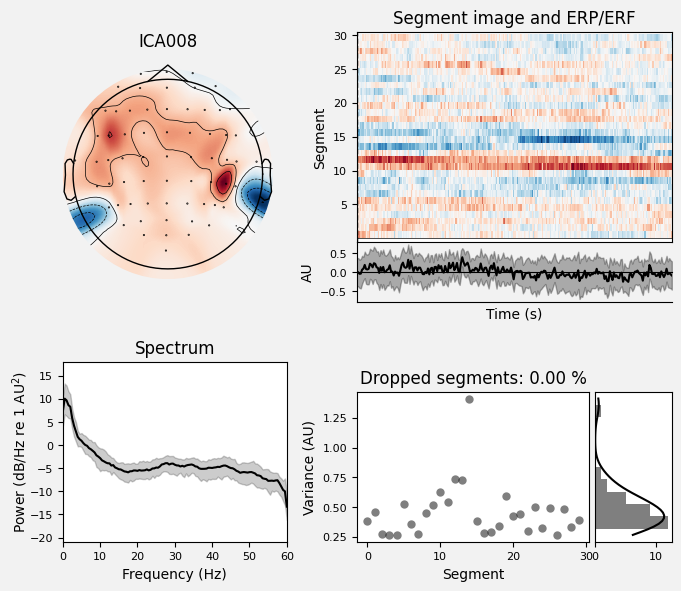

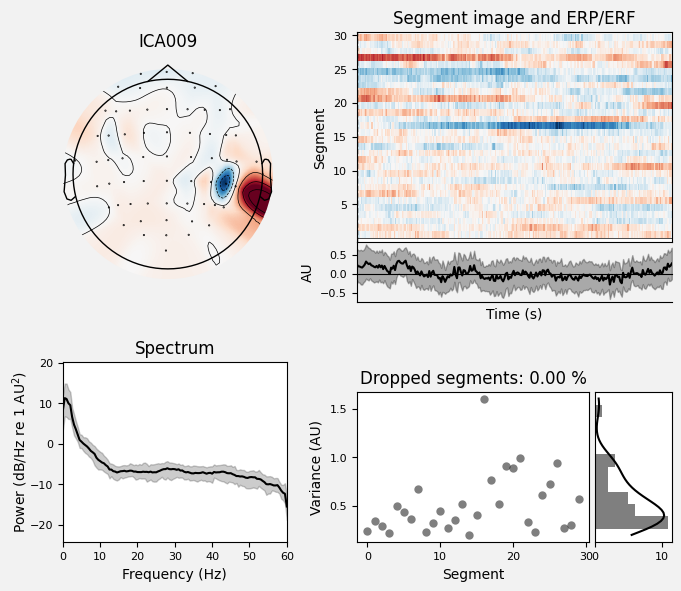

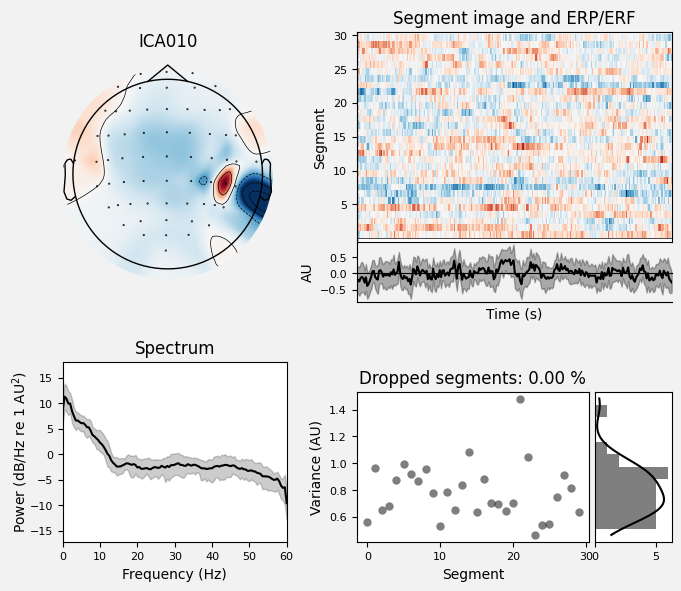

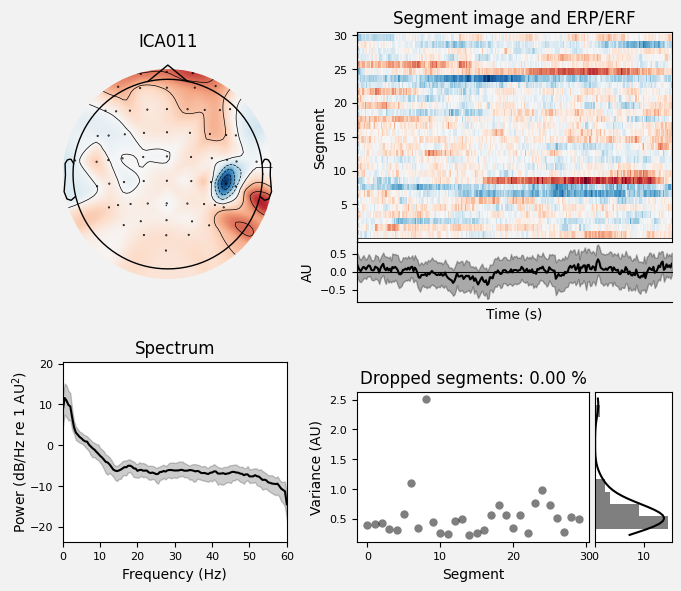

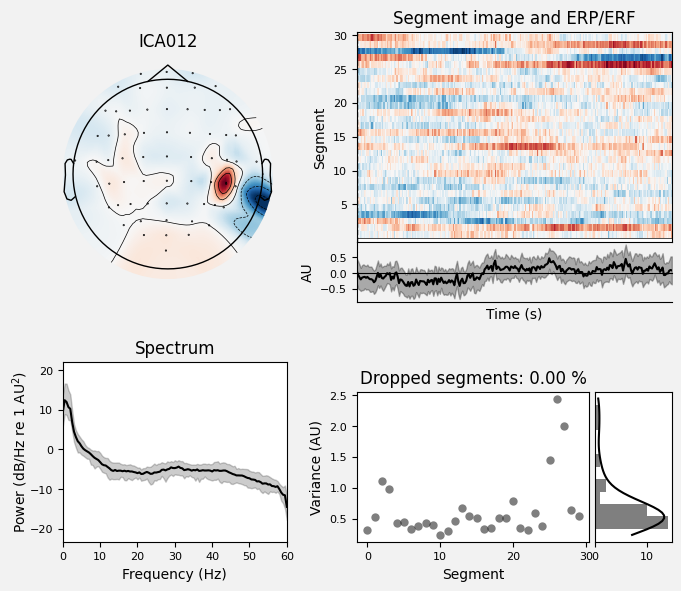

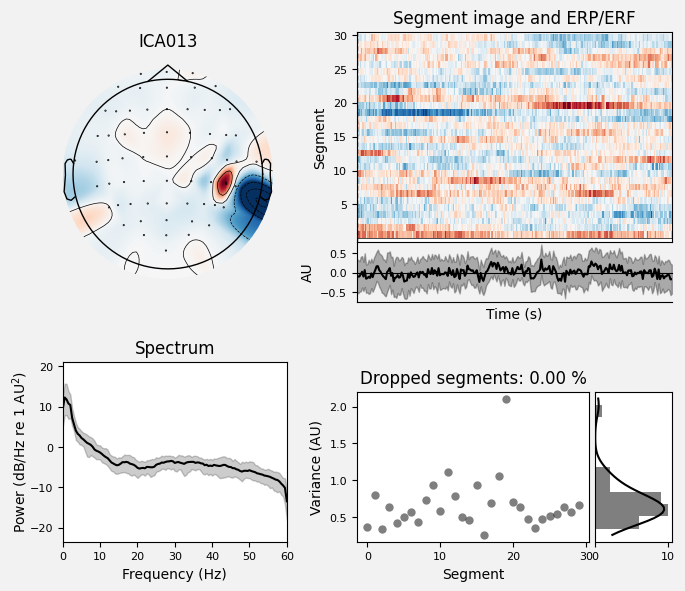

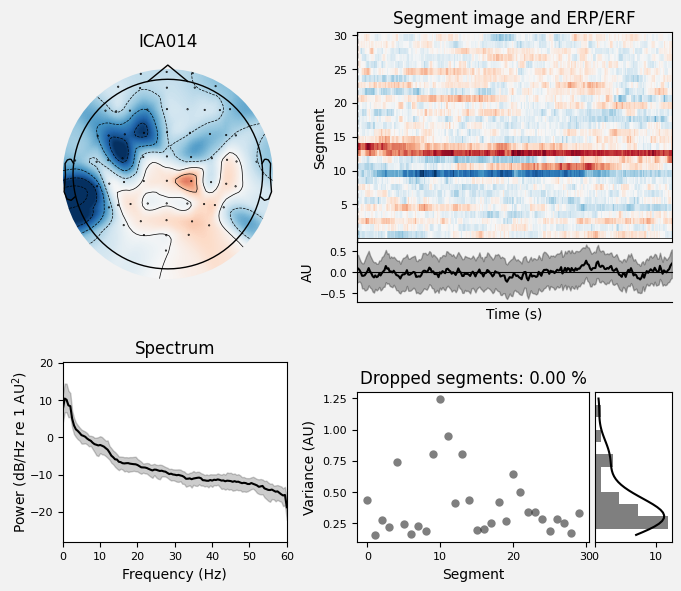

In [25]:
ica.plot_properties(raw, picks=range(num_components));

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated


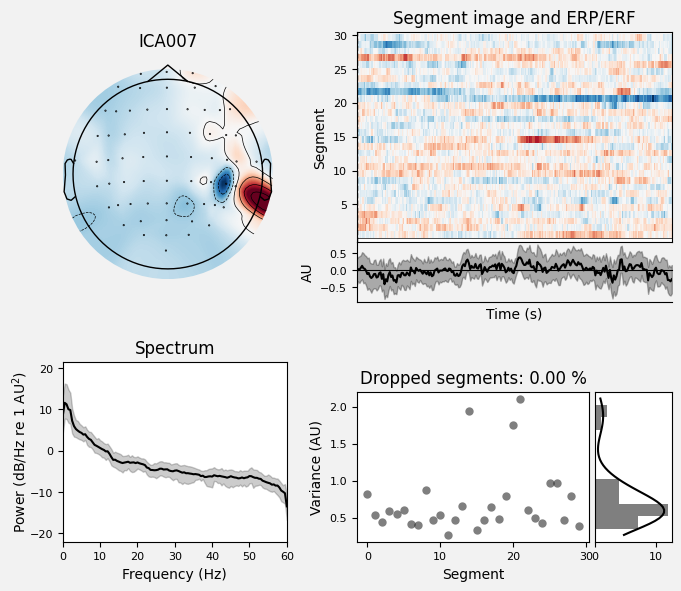

In [26]:
ica.plot_properties(raw, picks=7);

Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


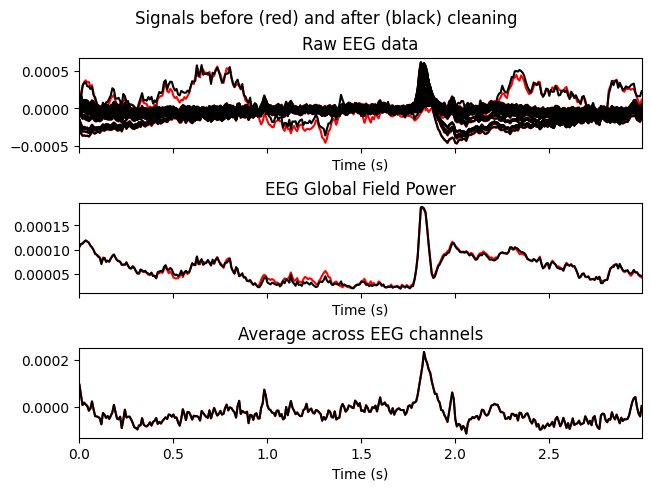

In [27]:
ica.plot_overlay(raw, exclude=[9]);